In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving income_evaluation.csv to income_evaluation.csv


In [46]:
df = pd.read_csv("income_evaluation.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
sex                0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [47]:
def unique(df):
  for col in df.columns:
    u = np.unique(df.loc[:, col])
    print(f'"{col}"', ":", u)

unique(df)

"age" : [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]
" workclass" : [' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
" fnlwgt" : [  12285   13769   14878 ... 1366120 1455435 1484705]
" education" : [' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
" education-num" : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
" marital-status" : [' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
" occupation" : [' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-in

In [48]:
df =df.drop(["age", " fnlwgt", " education", " occupation", " capital-gain", " capital-loss", " hours-per-week", " native-country"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0    workclass       32561 non-null  object
 1    education-num   32561 non-null  int64 
 2    marital-status  32561 non-null  object
 3    relationship    32561 non-null  object
 4    race            32561 non-null  object
 5    sex             32561 non-null  object
 6    income          32561 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB


In [49]:
unique(df)

" workclass" : [' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
" education-num" : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
" marital-status" : [' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
" relationship" : [' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
" race" : [' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
" sex" : [' Female' ' Male']
" income" : [' <=50K' ' >50K']


In [50]:
for col in df.columns:
  d = dict()
  s = np.unique(df.loc[:, col])
  for i in range(len(s)):
    d[s[i]] = i
  df[col] = df[col].map(d)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0    workclass       32561 non-null  int64
 1    education-num   32561 non-null  int64
 2    marital-status  32561 non-null  int64
 3    relationship    32561 non-null  int64
 4    race            32561 non-null  int64
 5    sex             32561 non-null  int64
 6    income          32561 non-null  int64
dtypes: int64(7)
memory usage: 1.7 MB


In [51]:
unique(df)

" workclass" : [0 1 2 3 4 5 6 7 8]
" education-num" : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
" marital-status" : [0 1 2 3 4 5 6]
" relationship" : [0 1 2 3 4 5]
" race" : [0 1 2 3 4]
" sex" : [0 1]
" income" : [0 1]


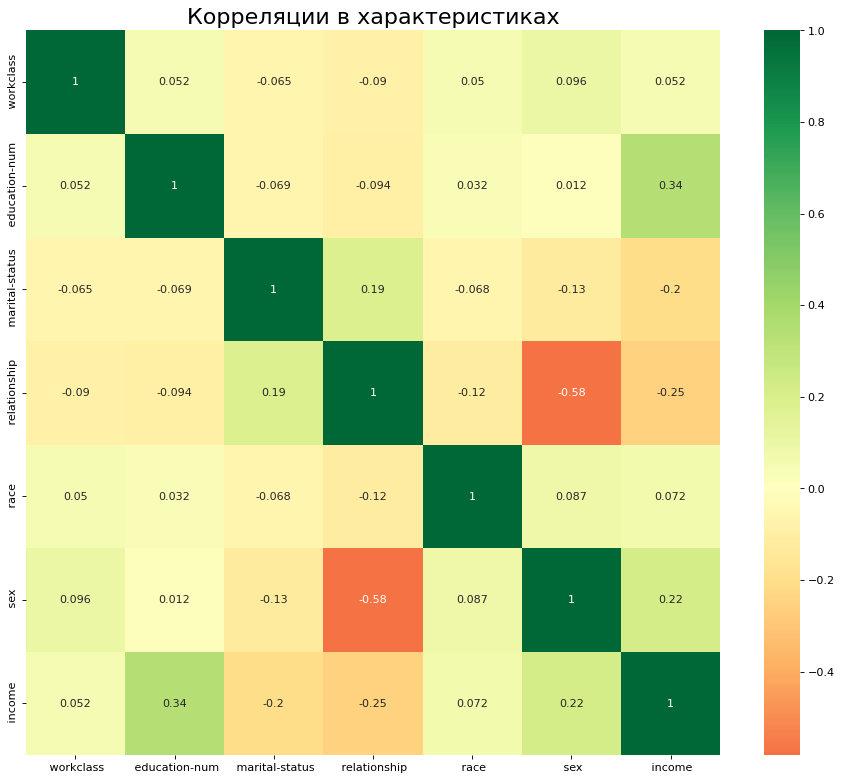

In [55]:
plt.figure(figsize=(14,12), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

In [62]:
x = df.drop(columns=' sex')
y = df[' sex']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [72]:
w0 = model.intercept_[0]
w1 = model.coef_[0]
w1

array([ 0.1023753 , -0.10639869, -0.0251183 , -0.86237697,  0.05429852,
        1.06572783])

In [75]:
equation = 'y = '
for i in range(len(w1)):
  equation += f'{w1[i]} * x{i + 1} + '
equation += f'{w0}'
equation

'y = 0.10237529817418324 * x1 + -0.10639868541824056 * x2 + -0.025118298682727087 * x3 + -0.8623769676962824 * x4 + 0.05429852070811279 * x5 + 1.0657278275393096 * x6 + 2.44100009791702'

In [77]:
pred = model.predict(x_test)

cm = confusion_matrix(y_test, pred)
cm

array([[1913, 1332],
       [1096, 5428]])

In [78]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 1913
FP: 1332
FN: 1096
TP: 5428


In [80]:
print("accuracy:",accuracy_score(y_test, pred))
print("recall:",recall_score(y_test, pred))
print("precision:",precision_score(y_test, pred))
print("f1:",f1_score(y_test, pred))

accuracy: 0.7514586958747057
recall: 0.8320049049662783
precision: 0.8029585798816568
f1: 0.8172237277928334


Наверное все +- хорошо, r,p,f1 > 0.8